# Individual Assignment

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from scipy.optimize import minimize

plt.style.use("ggplot")

RFR = 0.0441
TRADING_DAYS = 252

## Data Retrieval

In [28]:
tickers = ["AAPL", "MSFT", "AMZN", "META", "TSLA", "NVDA", "MSTR", "JPM", "HD", "JNJ"]
groups = []

for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31", auto_adjust=False)
    data.to_csv('ten_stocks_2020_2024.csv')
    data = pd.read_csv('ten_stocks_2020_2024.csv', header=[0,1], index_col=0, parse_dates=True)
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

df = pd.concat(groups)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,AAPL,72.620827,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,AAPL,71.914803,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,AAPL,72.487846,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,AAPL,72.146935,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,AAPL,73.307510,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...,...
2024-12-23,JNJ,142.891418,145.270004,145.330002,143.449997,144.630005,8720800
2024-12-24,JNJ,143.461914,145.850006,145.850006,144.330002,145.000000,3164100
2024-12-26,JNJ,143.196320,145.580002,146.369995,145.089996,145.509995,4656300


In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.isnull().sum().sum()

np.int64(0)

## Data Exploration

In [31]:
df.shape
pivot_df = df.pivot_table(index=df.index, columns="Ticker", values="Close")

print("Head of dataframe of closing prices")
display(pivot_df.head())

print("Tail of dataframe of closing prices")
display(pivot_df.tail())

Head of dataframe of closing prices


Ticker,AAPL,AMZN,HD,JNJ,JPM,META,MSFT,MSTR,NVDA,TSLA
Date,,,,,,,,,,
2020-01-02,75.087502,94.900497,219.660004,145.970001,141.089996,209.779999,160.619995,14.431,5.99775,28.684000
2020-01-03,74.357498,93.748497,218.929993,144.279999,138.339996,208.669998,158.619995,14.357,5.90175,29.534000
2020-01-06,74.949997,95.143997,219.960007,144.100006,138.229996,212.600006,159.029999,14.425,5.92650,30.102667
2020-01-07,74.597504,95.343002,218.520004,144.979996,135.880005,213.059998,157.580002,14.387,5.99825,31.270666
2020-01-08,75.797501,94.598503,221.789993,144.960007,136.940002,215.220001,160.089996,14.371,6.00950,32.809334


Tail of dataframe of closing prices


Ticker,AAPL,AMZN,HD,JNJ,JPM,META,MSFT,MSTR,NVDA,TSLA
Date,,,,,,,,,,
2024-12-23,255.270004,225.059998,392.450012,145.270004,238.389999,599.849976,435.250000,332.230011,139.669998,430.600006
2024-12-24,258.200012,229.050003,396.140015,145.850006,242.309998,607.750000,439.329987,358.179993,140.220001,462.279999
2024-12-26,259.019989,227.050003,395.140015,145.580002,243.139999,603.349976,438.109985,341.049988,139.929993,454.130005
2024-12-27,255.589996,223.750000,392.859985,145.050003,241.169998,599.809998,430.529999,330.000000,137.009995,431.660004
2024-12-30,252.199997,221.300003,389.429993,143.339996,239.320007,591.239990,424.829987,302.959991,137.490005,417.410004


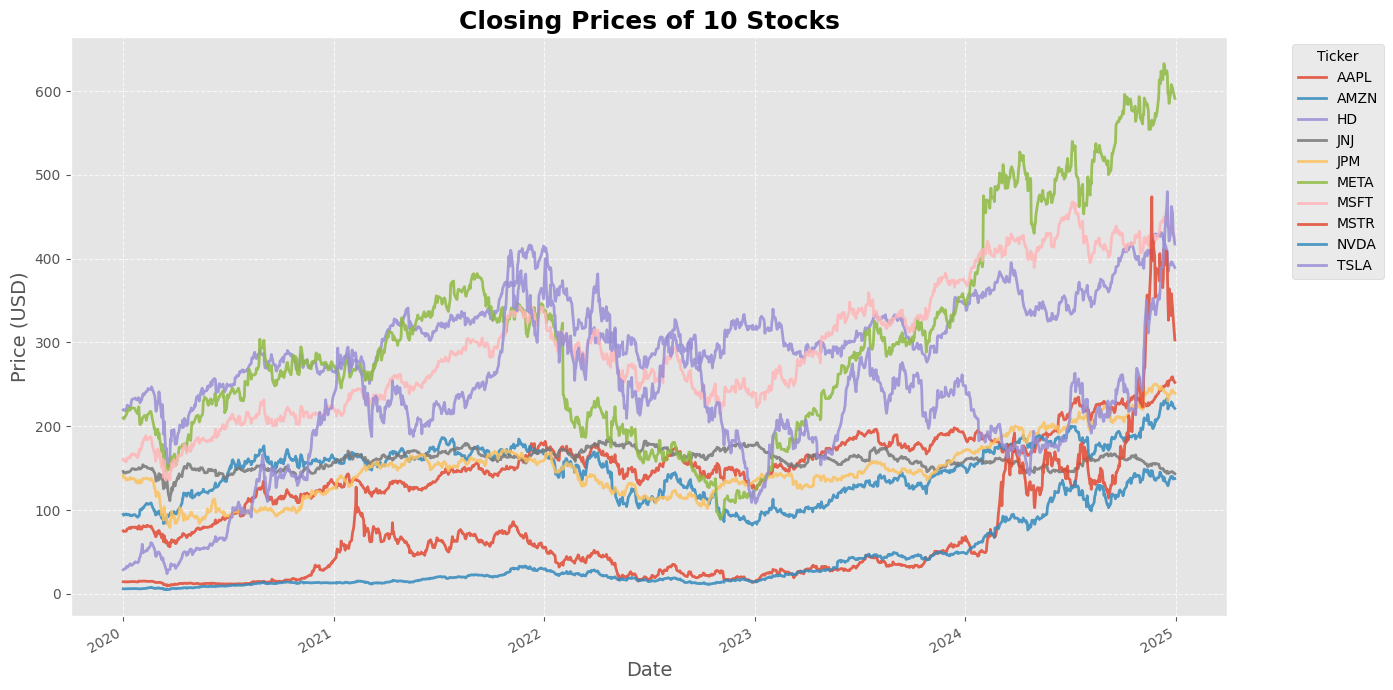

In [32]:
plt.figure(figsize=(14, 7))
pivot_df.plot(ax=plt.gca(), linewidth=2, alpha=0.85)
plt.title('Closing Prices of 10 Stocks', fontsize=18, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Backtesting

In [33]:
def bollinger_band(dfi):
    # Bollinger Bands calculation
    dfi["SMA"] = dfi["Close"].rolling(window=20).mean()
    dfi["Dev"] = dfi["Close"].rolling(window=20).std()
    dfi["HighBand"] = dfi["SMA"] + 2 * dfi["Dev"]
    dfi["MiddleBand"] = dfi["SMA"]
    dfi["LowBand"] = dfi["SMA"]  - 2 * dfi["Dev"]

    dfi["Signal"] = 0

    # Entry Signals
    dfi["Signal"] = np.where(dfi.LowBand > dfi.Close, 1, dfi.Signal)
    dfi["Signal"]= np.where(dfi.Close > dfi.HighBand, -1, dfi.Signal)

    # Exit Signals
    dfi["Signal"] = np.where((dfi.Signal.shift(1) == 1) & (dfi.Close >= dfi.SMA), 0, dfi.Signal)
    dfi["Signal"] = np.where((dfi.Signal.shift(1) == -1) & (dfi.Close <= dfi.SMA), 0, dfi.Signal)

    dfi["Signal"] = np.where(dfi.SMA.isna(), 0, dfi.Signal)

   # dfi["Position"] = dfi.Signal.replace(to_replace=0, method='ffill').fillna(0)
    dfi["Position"] = dfi.Signal.shift()

    return dfi


In [34]:
def strategy_returns(Close, signals):
    daily_ret = Close.pct_change().fillna(0)
    strat_ret = daily_ret * signals.shift(1).fillna(0)
    return daily_ret, strat_ret

results = {}

for ticker in tickers:
    ticker_df = df[df['Ticker'] == ticker].copy()
    strat = bollinger_band(ticker_df)
    daily_ret, strat_ret = strategy_returns(ticker_df['Close'], strat['Signal'])
    results[ticker] = {
        'daily_ret': daily_ret,
        'strat_ret': strat_ret,
        'cumulative_bh': (1 + daily_ret).cumprod() - 1,
        'cumulative_strat': (1 + strat_ret).cumprod() - 1
    }

In [35]:
for ticker in tickers:
    print(f"{ticker}: Buy+Hold: {results[ticker]['cumulative_bh'][-1]:.2%}, Strategy: {results[ticker]['cumulative_strat'][-1]:.2%}")

AAPL: Buy+Hold: 235.87%, Strategy: 17.96%
MSFT: Buy+Hold: 164.49%, Strategy: 72.75%
AMZN: Buy+Hold: 133.19%, Strategy: -12.10%
META: Buy+Hold: 181.84%, Strategy: 90.24%
TSLA: Buy+Hold: 1355.20%, Strategy: -85.62%
NVDA: Buy+Hold: 2192.36%, Strategy: 37.63%
MSTR: Buy+Hold: 1999.37%, Strategy: -80.75%
JPM: Buy+Hold: 69.62%, Strategy: 19.04%
HD: Buy+Hold: 77.29%, Strategy: 13.92%
JNJ: Buy+Hold: -1.80%, Strategy: 0.15%


/tmp/ipykernel_1587/235141857.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{ticker}: Buy+Hold: {results[ticker]['cumulative_bh'][-1]:.2%}, Strategy: {results[ticker]['cumulative_strat'][-1]:.2%}")


## Portfolio Management

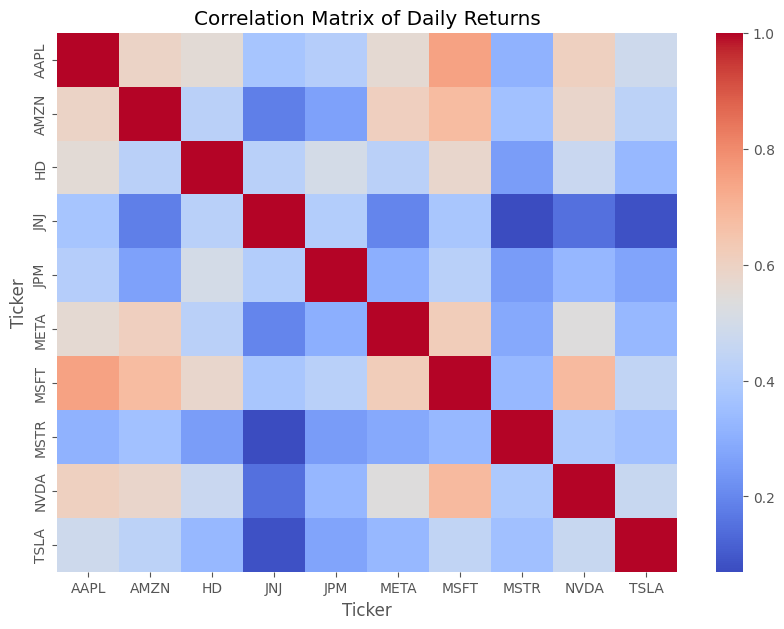

In [36]:
correlation_matrix = pivot_df.pct_change().corr()

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix of Daily Returns')
plt.show()

In [37]:
# df_pivot = df.pivot(index="DlyCalDt", columns="Ticker", values="DlyClose")
pivot_df.index = pd.to_datetime(pivot_df.index, dayfirst=True)
pivot_df.sort_index(inplace=True)

pivot_df.iloc[:, 0:10]
df = pivot_df.loc[:, ["AAPL", "MSFT", "AMZN", "META", "TSLA", "NVDA", "MSTR", "JPM", "HD", "JNJ"]]

weights = np.ones(10) / 10

returns = df.pct_change()
returns.dropna(inplace=True)

p_returns = returns.dot(weights)
p_returns.name = "Portfolio Daily Returns"
p_returns


Date
2020-01-03   -0.006550
2020-01-06    0.007512
2020-01-07    0.002127
2020-01-08    0.010694
2020-01-09    0.006237
                ...   
2024-12-23    0.000579
2024-12-24    0.023721
2024-12-26   -0.008405
2024-12-27   -0.017121
2024-12-30   -0.019138
Name: Portfolio Daily Returns, Length: 1256, dtype: float64

In [ ]:
cumulative_return = (1 + p_returns).cumprod() - 1
final_cumulative_return = cumulative_return.iloc[-1]
print(f"Cumulative portfolio return: {final_cumulative_return: .4%}")
cumulative_return

Cumulative portfolio return:  480.9007%


Date
2020-01-03   -0.006550
2020-01-06    0.000913
2020-01-07    0.003042
2020-01-08    0.013768
2020-01-09    0.020091
                ...   
2024-12-23    4.935779
2024-12-24    5.076580
2024-12-26    5.025508
2024-12-27    4.922349
2024-12-30    4.809007
Name: Portfolio Daily Returns, Length: 1256, dtype: float64

In [40]:
p_volatility = p_returns.std()
print(f"Annualized Volatility: {p_volatility: .2}")

Annualized Volatility:  0.019


## Portfolio Optimisation

In [41]:
def negative_sharpe(weights):
    p_returns = np.dot(returns, weights)
    annualised_returns = p_returns.mean() * TRADING_DAYS
    annualised_volatility = p_returns.std() * np.sqrt(TRADING_DAYS)
    sharpe = (annualised_returns - RFR) / annualised_volatility

    return -sharpe

In [42]:
cons = {"type": "eq", "fun": lambda x: sum(x) - 1}

bounds = tuple((0, 1) for x in range(10))

init_weights = np.ones(10) / 10

optimal = minimize(negative_sharpe, init_weights, bounds=bounds, constraints=cons)
opt_weights = optimal.x
opt_weights

array([3.08650588e-17, 0.00000000e+00, 9.21007857e-17, 0.00000000e+00,
       2.17808542e-01, 5.81148440e-01, 2.01043017e-01, 2.92062698e-17,
       0.00000000e+00, 1.55883688e-17])

In [43]:
port_daily_returns_opt = returns.dot(opt_weights)
port_cumulative_daily_return_opt = (1 + port_daily_returns_opt).cumprod() -1
port_cumulative_daily_return_opt.name = "Returns for maximising the Sharpe Ratio Portfolio"
port_cumulative_daily_return_opt

Date
2020-01-03    -0.003878
2020-01-06     0.003675
2020-01-07     0.018688
2020-01-08     0.030488
2020-01-09     0.031837
                ...    
2024-12-23    31.509599
2024-12-24    32.615452
2024-12-26    32.122756
2024-12-27    31.148353
2024-12-30    30.453061
Name: Returns for maximising the Sharpe Ratio Portfolio, Length: 1256, dtype: float64

In [44]:
## Maximise return for Target Risk

target_volatility = 0.20
num_assets = len(pivot_df.columns)

# Calculate expected returns and covariance matrix
expected_returns = returns.mean() * TRADING_DAYS
cov_matrix = returns.cov() * TRADING_DAYS

# Objective Function: Negative Expected Return
def negative_portfolio_return(weights, expected_returns):
	return -np.dot(weights, expected_returns)

# Constraint: Portfolio volatility must be ≤ target
def volatility_constraint(weights, cov_matrix, target_volatility):
	portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
	return target_volatility - portfolio_volatility  # Must be ≥ 0

# Constraint: Weights must sum to 1
def weight_sum_constraint(weights):
	return np.sum(weights) - 1

# Bounds and Initial Guess
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = np.array([1.0 / num_assets] * num_assets)

# Constraints Dictionary
constraints = [
	{'type': 'eq', 'fun': weight_sum_constraint},
	{'type': 'ineq', 'fun': lambda w: volatility_constraint(w, cov_matrix, target_volatility)}
]

# Run Optimisation
result = minimize(
	negative_portfolio_return,
	initial_weights,
	args=(expected_returns,),
	method='SLSQP',
	bounds=bounds,
	constraints=constraints
)

# Output Results
if result.success:
	optimal_weights = result.x
	max_return = -result.fun
	final_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
	print("Optimal Portfolio Weights:", optimal_weights)
	print("Maximum Expected Return (under target risk):", max_return)
	print("Portfolio Volatility:", final_volatility)
else:
	print("Optimization failed:", result.message)


Optimal Portfolio Weights: [3.78497856e-02 4.39220464e-17 6.36101809e-02 5.06525702e-18
 4.93713887e-02 9.47968873e-02 3.18518584e-02 5.09570761e-02
 4.32370727e-02 6.28325750e-01]
Maximum Expected Return (under target risk): 0.19472836182160105
Portfolio Volatility: 0.2000000130930601


In [45]:
port_daily_returns_opt_maxret = returns.dot(optimal_weights)
port_cumulative_daily_return_opt_maxret = (1 + port_daily_returns_opt_maxret).cumprod() -1
port_cumulative_daily_return_opt_maxret.name = "Maximise Return for Target Risk Portfolio Returns"
port_cumulative_daily_return_opt_maxret


Date
2020-01-03   -0.009769
2020-01-06   -0.007663
2020-01-07   -0.002084
2020-01-08    0.001550
2020-01-09    0.005289
                ...   
2024-12-23    1.426021
2024-12-24    1.454669
2024-12-26    1.444549
2024-12-27    1.420523
2024-12-30    1.388373
Name: Maximise Return for Target Risk Portfolio Returns, Length: 1256, dtype: float64

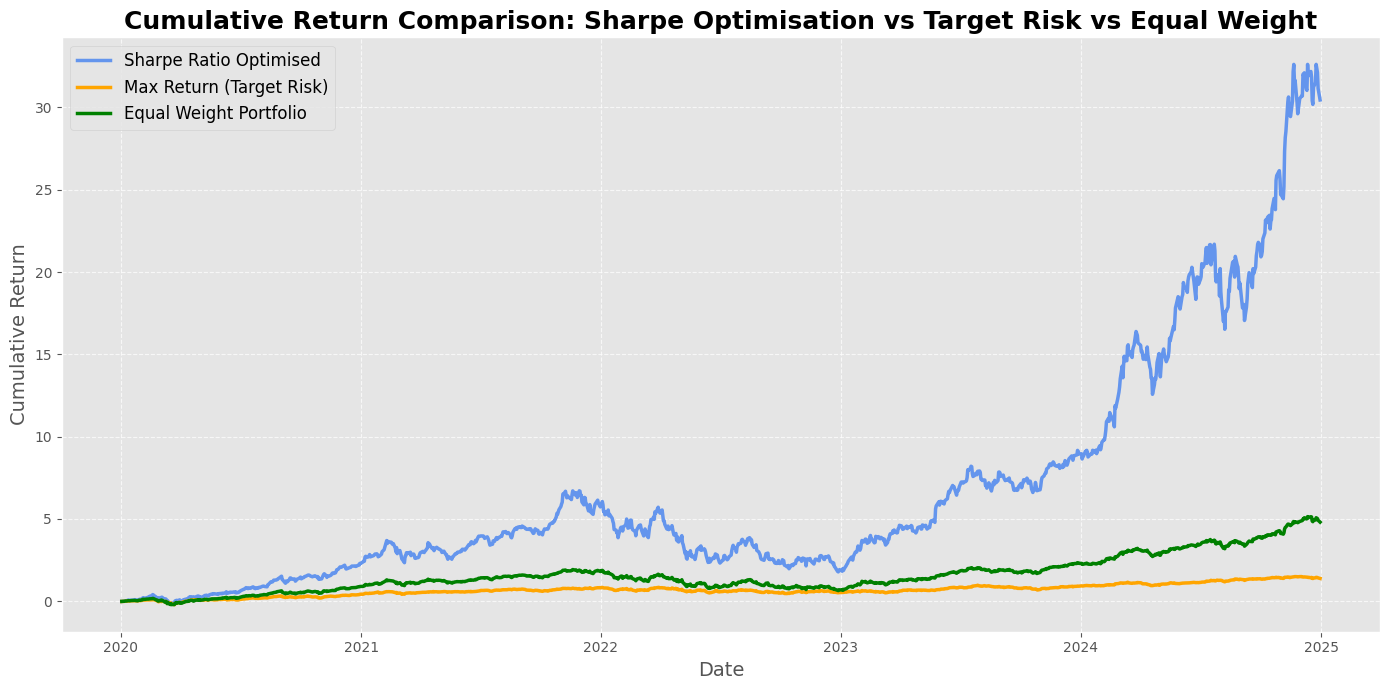

In [58]:
plt.figure(figsize=(14, 7))
plt.plot(port_cumulative_daily_return_opt, label="Sharpe Ratio Optimised", linewidth=2.5, color="cornflowerblue")
plt.plot(port_cumulative_daily_return_opt_maxret, label="Max Return (Target Risk)", linewidth=2.5, color="orange")
plt.plot(cumulative_return, label="Equal Weight Portfolio", linewidth=2.5, color="green")

plt.title("Cumulative Return Comparison: Sharpe Optimisation vs Target Risk vs Equal Weight", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Return", fontsize=14)
plt.legend(fontsize=12, frameon=True, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()